# Part 1 - Data Preparation and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data
json_reader = pd.read_json('data/reviews_Video_Games_5.json', lines=True, chunksize=1000)

# instantiate data frame
df = pd.DataFrame(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'])

# process data
num_chunks = 0
for chunk in json_reader:
    df = pd.concat([df, chunk])
    num_chunks+=1
    

print('Number of reviews: %d' % len(df))
print('Number of chunks: %d' % num_chunks)

Number of reviews: 231780
Number of chunks: 232


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 9 columns):
asin              231780 non-null object
helpful           231780 non-null object
overall           231780 non-null object
reviewText        231780 non-null object
reviewTime        231780 non-null object
reviewerID        231780 non-null object
reviewerName      228967 non-null object
summary           231780 non-null object
unixReviewTime    231780 non-null object
dtypes: object(9)
memory usage: 17.7+ MB


In [4]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600


#  1.1 Describe the dataset

We selected the Videogame review set. It contains 231780 reviews. The attributes available in the data set include the unique item number (`asin`), the ratings (`helpful, overall`), metadata about the review (`reviewText, reviewTime, summary, unixReviewTime`), and metadata about the reviewer (`reviewerID, reviewerName`). We will use the ratings and review metadata to analyze the sentiment of the reviews and we will use the time metadata for studying the cyclical events as well as influence of critical events. 

In [2]:
# remove reviewTime column
if 'reviewTime' in df.columns:
    df.drop(columns=['reviewTime'], inplace=True)

# show na/null values
null_data = df[df.isnull().any(axis=1)]

print(null_data[:5])

# the only column worth filling is the 'reviewerName'

            asin helpful overall  \
78    9861019731  [0, 0]       5   
831   B00000F1GM  [3, 3]       5   
1007  B00000I1BF  [0, 0]       5   
1008  B00000I1BF  [0, 0]       5   
1471  B00000IWYT  [0, 0]       5   

                                             reviewText      reviewerID  \
78        It works perfectly! Nothing is wrong with it.  A26HSO6VAFB2V4   
831   For those of you who haven't played Super Mari...  A2WTO0ST2SUUY9   
1007  classic game for the ps1. i love it and it sti...   A3OU09O34BC73   
1008  I was feeling nostalgic so I bought this game ...   ANLC4FX4QK23V   
1471  Wow...the only Game Boy games that even come c...  A1OYBF92TASIWN   

     reviewerName                              summary unixReviewTime  
78            NaN                             Perfect!     1405209600  
831           NaN                Super Mario 64 Review     1357776000  
1007          NaN                             so fun!!     1405209600  
1008          NaN                 Blast from

In [3]:
# fill na values
na_values = { 'asin': 0, 'overall': 0, 'reviewText': 'Review Text Not Available', 'reviewerID': 'Reviewer ID Not Available', 'reviewerName': 'Missing Reviewer Name', 'summary': 'Summary Not Available', 'unixReviewTime': 0 }
df.fillna(value={'reviewerName': 'Missing Reviewer Name'}, inplace=True)

# 1.2 Data Preparation and Preprocessing
Data is loaded via Pandas `.read_json` method using `chunkloading`. This returns an iterable `FileReader` object containing `DataFrames` as chunks of data. We then concatenate all of these chunks into a single `DataFrame`. Data is cleaned by filling all of the NA values with a default value. In our data set the only missing data was `reviewerName`; it was replaced with the string `"Missing Reviewer Name"`.

# 1.3 Hypothesis about the Analysis
We believe there will be a positive correlation between positive-sentiment reviews and high ratings. (Nana insert a hypothesis for your Analysis question here)

# Part 2 - Data Analysis

In [25]:
from textblob import TextBlob

df['sentiment'] = df.apply(lambda row: TextBlob(row['reviewText']).sentiment, axis=1)

df.head()

,asin,helpful,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime,sentiment
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000,"(-0.0001893939393939522, 0.6036195286195286)"
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,"(0.225, 0.4125)"
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,"(-0.1708333333333333, 0.8166666666666668)"
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400,"(0.007527056277056293, 0.4751455026455026)"
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,"(0.19079545454545455, 0.4518181818181818)"


Text(0,0.5,'Average Polarity')

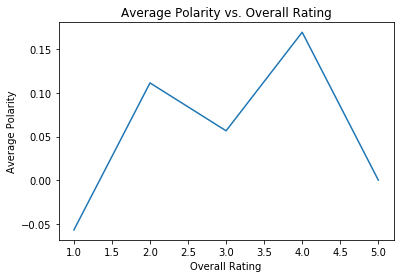

In [8]:
import matplotlib.pyplot as plt

data_list = [(review['overall'], review['sentiment']) for i, review in df.iterrows()]

avg_pol_vs_ovrl = dict()
for entry in data_list:
    if entry[0] in avg_pol_vs_ovrl:
        avg_pol_vs_ovrl[entry[0]] += [entry[1].polarity]
    else:
        avg_pol_vs_ovrl[entry[0]] = [entry[1].polarity]

overall_ratings = list(range(1, 6))
average_polarity = [np.average(v) for k, v in avg_pol_vs_ovrl.items()]

plt.plot(overall_ratings, average_polarity)
plt.title('Average Polarity vs. Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Average Polarity')

Text(0,0.5,'Polarity')

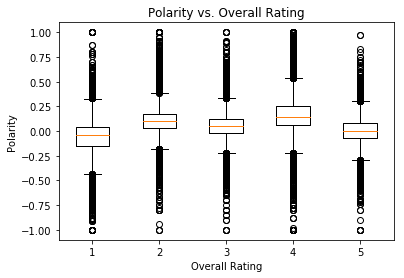

In [9]:
data = [v for k, v in avg_pol_vs_ovrl.items()]
plt.boxplot(data)
plt.title('Polarity vs. Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Polarity')

{1: Counter({'pos': 7561, 'neg': 7292}), 2: Counter({'pos': 8698, 'neg': 4965}), 3: Counter({'pos': 21470, 'neg': 6805}), 4: Counter({'pos': 47276, 'neg': 7528}), 5: Counter({'pos': 104465, 'neg': 15720})}


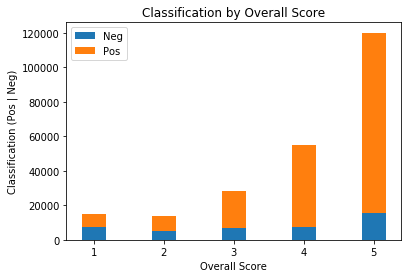

In [48]:
# Use NaiveBayesAnalyzer instead
# And graph based on Classifier
import nltk
# nltk.download('punkt')
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
from collections import Counter

t_df = df

tb = Blobber(analyzer=NaiveBayesAnalyzer())

t_df.loc[:,'sentiment'] = t_df.apply(lambda row: tb(row['reviewText']).sentiment, axis=1)

data_list = [(review['overall'], review['sentiment']) for i, review in t_df.iterrows()]

class_vs_ovrl = dict()

for entry in data_list:
    if entry[0] in class_vs_ovrl:
        class_vs_ovrl[entry[0]] += [entry[1].classification]
    else:
        class_vs_ovrl[entry[0]] = [entry[1].classification]

overall_ratings = list(range(1, 6))
count_dict = { 1: None, 2: None, 3: None, 4: None, 5: None }
for k, v in class_vs_ovrl.items():
    count_dict[k] = Counter(v)
    
neg_counts = [v['neg'] for k, v in count_dict.items()]
pos_counts = [v['pos'] for k, v in count_dict.items()]

print(count_dict)

N = 5
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, neg_counts, width)
p2 = plt.bar(ind, pos_counts, width, bottom=neg_counts)

max_of_counts = max(neg_counts) + max(pos_counts)

plt.ylabel('Classification (Pos | Neg)')
plt.title('Classification by Overall Score')
plt.xlabel('Overall Score')
plt.xticks(ind, ('1', '2', '3', '4', '5'))
plt.legend((p1[0], p2[0]), ('Neg', 'Pos'))

plt.show()

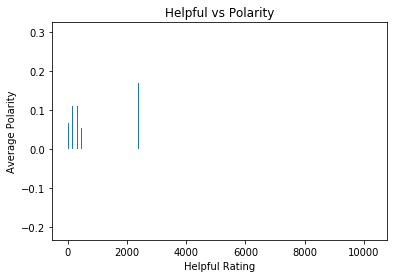

In [6]:
# Look at objectivity vs helpfulness

import matplotlib.pyplot as plt
from textblob import Blobber
# trial_df = df[:500]

# In the helpful array:
# the first value is votes for 'helpful', 
# second value if votes for 'not helpful'
tb = Blobber()
df.loc[:,'sentiment'] = df.apply(lambda row: tb(row['reviewText']).sentiment, axis=1)

adjust_helpful_metric = lambda h: h[0]
data_list = [(adjust_helpful_metric(review['helpful']), review['sentiment']) for i, review in df.iterrows()]

help_vs_pol = dict()
for entry in data_list:
    if entry[0] in help_vs_pol:
        help_vs_pol[entry[0]] += [entry[1].polarity]
    else:
        help_vs_pol[entry[0]] = [entry[1].polarity]

helpful_ratings = list(help_vs_pol.keys())
average_polarity = [np.average(v) for k, v in help_vs_pol.items()]
width = 0.35
p1 = plt.bar(helpful_ratings, average_polarity, width)

plt.ylabel('Average Polarity')
plt.title('Helpful vs Polarity')
plt.xlabel('Helpful Rating')
plt.show()